In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import pandas as pd
from skimage import filters
from os import listdir
from os.path import isfile, join
import scipy
from scipy import ndimage
from os import listdir
from os.path import isfile, join
import cv2
plt.rcParams["figure.figsize"] = (21,9)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


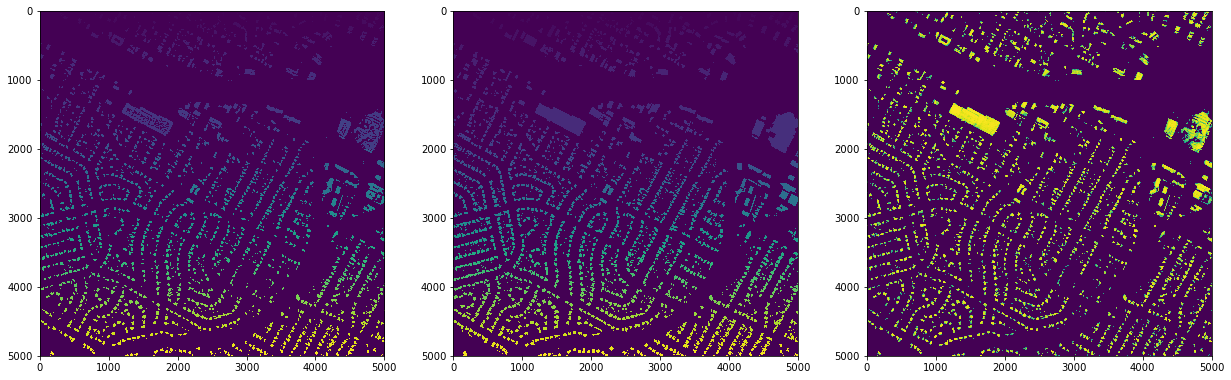

Number of DEC objects is 2512 
Number of ORI objects is 2393 


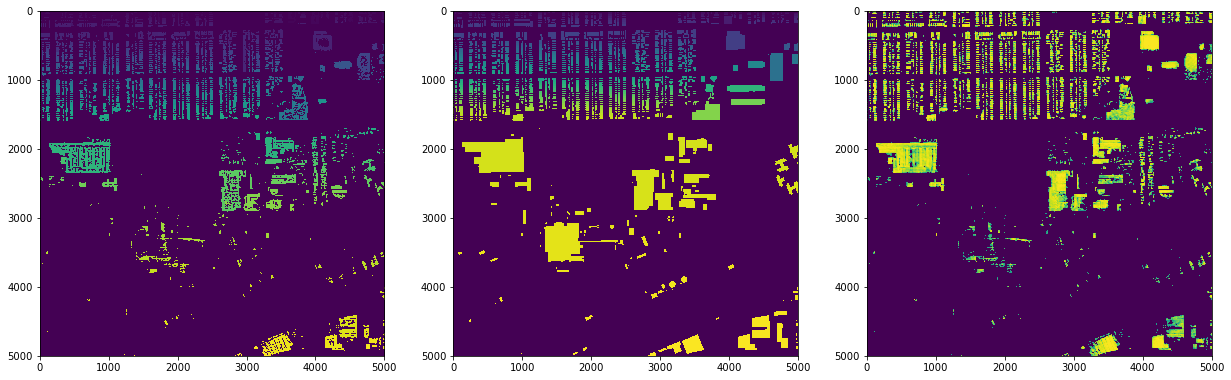

Number of DEC objects is 2263 
Number of ORI objects is 1943 


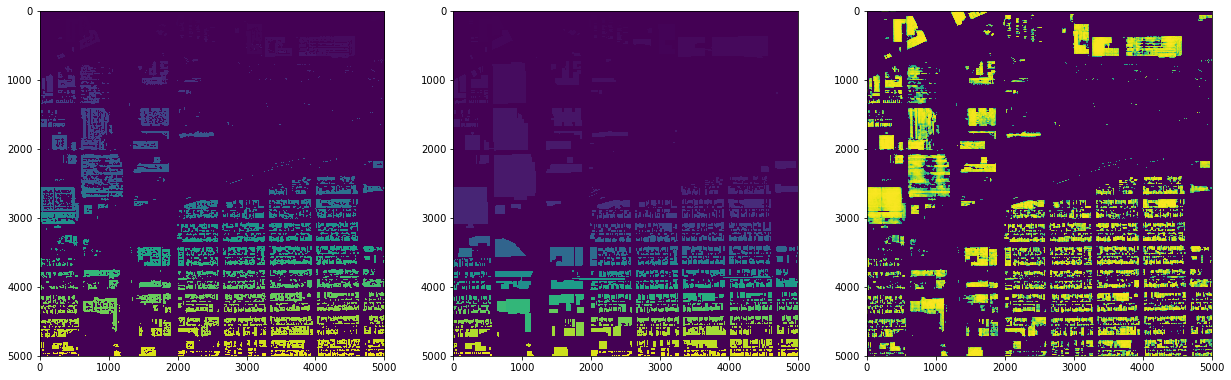

Number of DEC objects is 2058 
Number of ORI objects is 2291 


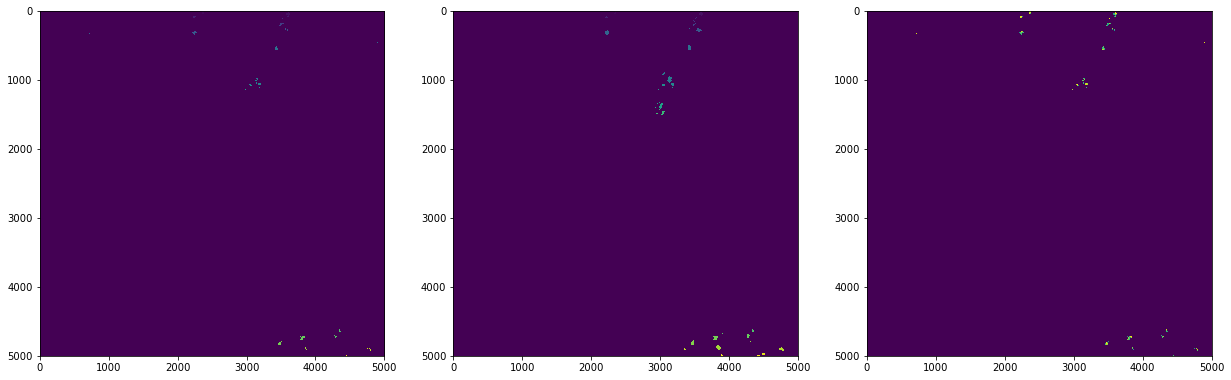

Number of DEC objects is 43 
Number of ORI objects is 43 


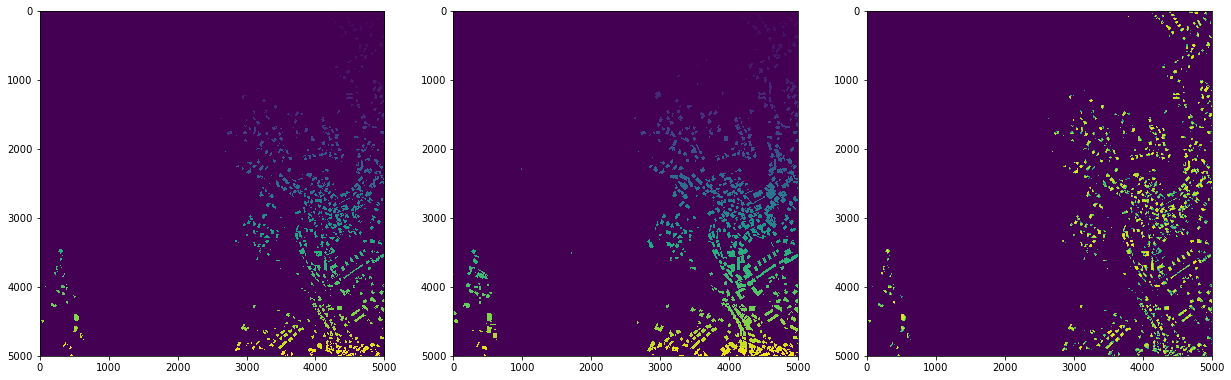

Number of DEC objects is 899 
Number of ORI objects is 677 


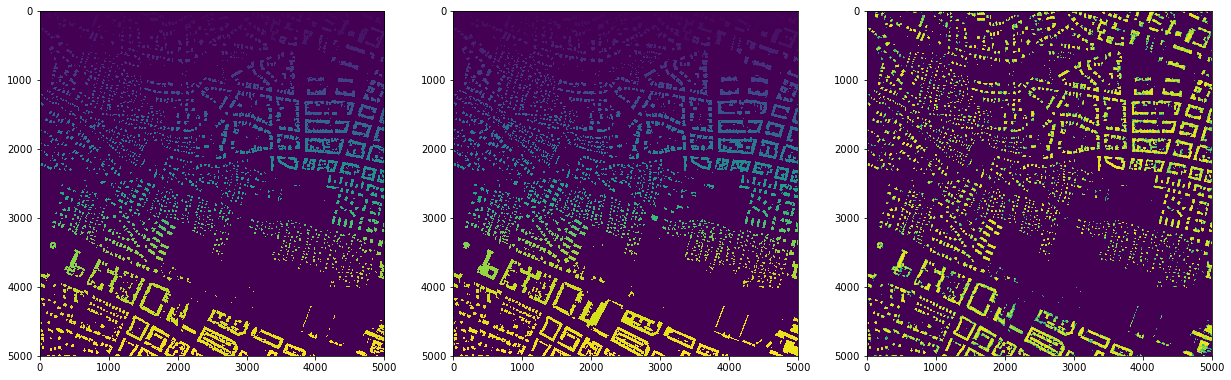

Number of DEC objects is 2543 
Number of ORI objects is 3294 


In [4]:
filelist = [f for f in listdir('D:/DataSet/AerialImageDataset/counting/gt/') if isfile(join('D:/DataSet/AerialImageDataset/counting/gt/', f))]
bin_path = 'D:/DataSet/AerialImageDataset/counting/bin/'
for name in filelist:
    f,ax = plt.subplots(1,3)
    gt = PIL.Image.open('D:/DataSet/AerialImageDataset/counting/gt/'+name)
    img = PIL.Image.open('D:/DataSet/AerialImageDataset/counting/bin/'+name)

    blur_radius = 0.0
    threshold = 50
    
    
    gt = np.array(gt) # gray-scale image
    img = np.array(img)
#     img[img<127] = 0
    ax[2].imshow(img)
    img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,101,0)
#     img = cv2.morphologyEx(img,cv2.MORPH_OPEN,np.ones((11,11),dtype=np.uint8))
    # smooth the image (to remove small objects)
    imgf = ndimage.gaussian_filter(img, blur_radius)
    # find connected components
    labeled, nr_objects_dec = ndimage.label(imgf > threshold) 
    ax[0].imshow(labeled)
    labeled, nr_objects = ndimage.label(gt > threshold)
    ax[1].imshow(labeled)
    
    f.show()
    plt.show()
    print("Number of DEC objects is %d " % nr_objects_dec)
    print("Number of ORI objects is %d " % nr_objects)

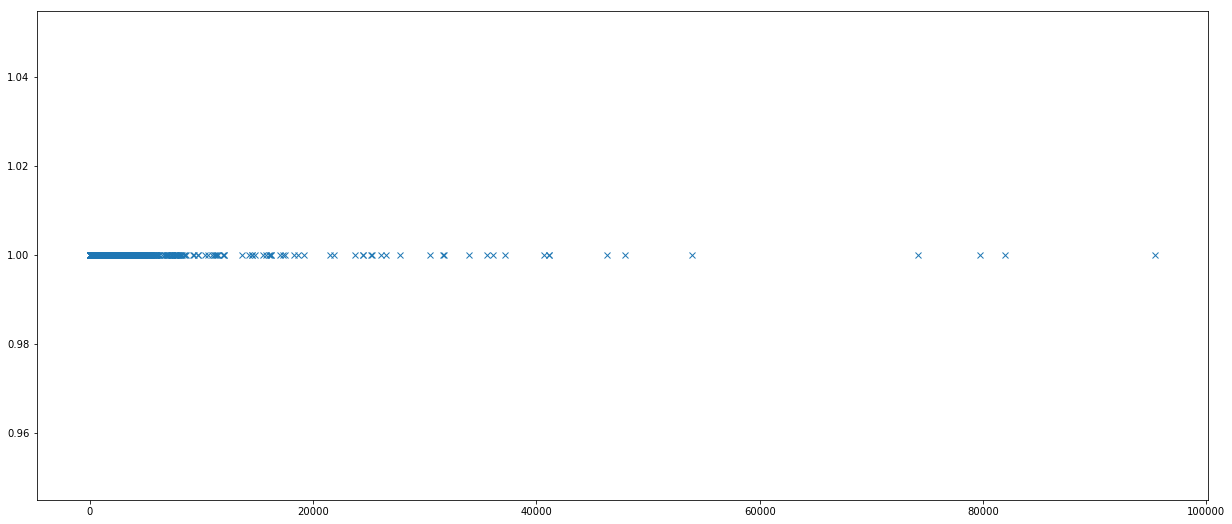

In [3]:
df = pd.DataFrame(labeled[labeled!=0].flatten(),columns=['class'])
group = df.groupby('class').size().reset_index(name='counts')
group
plt.plot(group['counts'],len(group['counts'])*[1],'x')
plt.show()

In [ ]:
import seaborn as sns
sns.distplot(labeled[labeled!=0].flatten(), kde=False)
plt.show()

In [ ]:
labeled.flatten().shape